## Electric vehicles in Delaware
Peter Attia, [petermattia.com](http://petermattia.com)

Last updated October 23, 2017

This notebook investigates electric vehicle purchases in Delaware.

Data: https://data.delaware.gov/Energy-and-Environment/State-Rebates-for-Alternative-Fuel-Vehicles/8z8z-di7f

Downloaded on October 22, 2017 (data last updated October 2, 2017)

More information about the program:

http://www.dnrec.delaware.gov/energy/Pages/The-Delaware-Clean-Vehicle-Rebate-Program.aspx

http://www.dnrec.delaware.gov/energy/Pages/Clean-Transportation-Incentives-Home.aspx

http://www.dnrec.delaware.gov/energy/Pages/Clean-Transportation-July2015-October2016.aspx

### Imports

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats as sp
import matplotlib.pyplot as plt
import folium
import pandas as pd
from collections import Counter
from branca.colormap import linear
import json
import seaborn as sns
sns.set()

I use a custom hisogram function that centers the x-label:

In [2]:
def histogram(dist):
    # Wrapper function to get MATLAB-like histogram() functionality
    plt.hist(dist, bins=np.arange(min(dist)-0.5, max(dist)+1.5, 1))

### Load the `rebates` dataset

In [3]:
rebates = pd.read_csv('State_Rebates_for_Alternative-Fuel_Vehicles.csv')
rebates.head(10)

,Award Number,Rebate Amount,City,State,County,Zip,Age,Gender,Date of Purchase,Dealership,Vehicle Type,Make,Model,Year,Lease?,Gasoline Emissions,Alt-Fuel Emissions
0,CVR071501,$2200.00,Hockessin,DE,New Castle,19707,81.0,M,07/20/2015,Sheridan Ford,Plug-in Hybrid,Ford,Fusion Energi,2016,No,14815.0,6575.0
1,CVR071502,$2200.00,Wilmington,DE,New Castle,19809,47.0,M,07/20/2015,Porter Ford,Plug-in Hybrid,Ford,C-Max Energi,2015,Yes,14815.0,6575.0
2,CVR071503,$2200.00,Wilmington,DE,New Castle,19810,47.0,M,07/22/2015,Darcars of Lanham Severn. Inc.,Electric,Ford,Focus Electric,2015,Yes,14815.0,5539.0
3,CVR071504,$2200.00,Wilmington,DE,New Castle,19808,66.0,M,07/20/2015,Sheridan Ford,Plug-in Hybrid,Ford,C-Max Energi,2015,Yes,14815.0,6575.0
4,CVR071505,$2200.00,New Castle,DE,New Castle,19720,51.0,M,07/24/2015,Sheridan Ford,Plug-in Hybrid,Ford,Fusion Energi,2015,Yes,14815.0,6575.0
5,CVR071506,$2200.00,Milton,DE,Sussex,19968,78.0,M,07/24/2015,Nucar Lewes Automall,Plug-in Hybrid,Chevrolet,Volt,2015,No,14815.0,6575.0
6,CVR081507,$2200.00,Magnolia,DE,Kent,19962,51.0,F,07/31/2015,Willis Ford,Plug-in Hybrid,Ford,C-Max Energi,2015,Yes,14815.0,6575.0
7,CVR081508,$2200.00,Wilmington,DE,New Castle,19810,47.0,M,08/06/2015,Nucar Chevrolet,Plug-in Hybrid,Chevrolet,Volt,2015,Yes,14815.0,6575.0
8,CVR081509,$2200.00,Dover,DE,Kent,19904,62.0,M,07/31/2015,Willis Ford,Plug-in Hybrid,Ford,C-Max Energi,2015,No,14815.0,6575.0
9,CVR081510,$2200.00,Newark,DE,New Castle,19711,72.0,M,07/31/2015,Porter Ford,Plug-in Hybrid,Ford,Fusion Energi,2015,Yes,14815.0,6575.0


### Ages

(<matplotlib.text.Text at 0x10e32bf28>, <matplotlib.text.Text at 0x10e5917b8>)

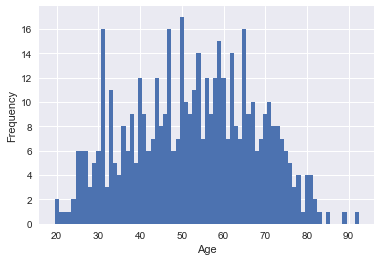

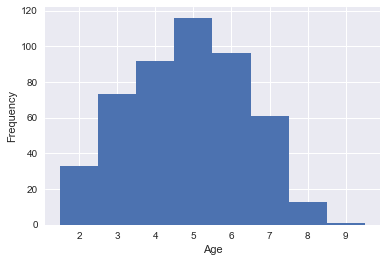

In [4]:
cleaned_ages = [x for x in rebates["Age"].values if str(x) != 'nan']
histogram(cleaned_ages)
plt.xlabel('Age'),plt.ylabel('Frequency')

plt.figure()
cleaned_ages = [x for x in rebates["Age"].values//10 if str(x) != 'nan']
histogram(cleaned_ages)
plt.xlabel('Age'),plt.ylabel('Frequency')

### County

In [6]:
Counter(rebates["County"])

Counter({'Kent': 76, 'Kent ': 1, 'New Castle': 330, 'Sussex': 108})

In [7]:
rebates["County"] = rebates["County"].str.strip()
county_counter = Counter(rebates["County"])
county_counter

Counter({'Kent': 77, 'New Castle': 330, 'Sussex': 108})

### Makes

In [8]:
Counter(rebates["Make"])

Counter({'Audi': 5,
         'BMW': 18,
         'BMW ': 7,
         'Cadillac': 1,
         'Chevrolet': 89,
         'FORD': 1,
         'Ford': 268,
         'Ford ': 2,
         'Hyundai': 3,
         'Kia': 1,
         'Mercedes-Benz': 2,
         'Nissan': 20,
         'Porsche ': 2,
         'Tesla': 69,
         'Tesla ': 1,
         'Toyota': 22,
         'Volvo': 2,
         'ford': 2})

In [9]:
rebates["Make"] = rebates["Make"].str.title()
rebates["Make"] = rebates["Make"].str.replace(" ","")
rebates["Make"] = rebates["Make"].str.replace("Bmw","BMW")
make_counter = Counter(rebates["Make"])
make_counter

Counter({'Audi': 5,
         'BMW': 25,
         'Cadillac': 1,
         'Chevrolet': 89,
         'Ford': 273,
         'Hyundai': 3,
         'Kia': 1,
         'Mercedes-Benz': 2,
         'Nissan': 20,
         'Porsche': 2,
         'Tesla': 70,
         'Toyota': 22,
         'Volvo': 2})

### Models

In [10]:
rebates["Model"] = rebates["Model"].str.strip() # clean whitespace
model_counter = Counter(rebates["Model"]).most_common()
model_counter

[('Fusion Energi', 137),
 ('C-Max Energi', 117),
 ('Volt', 73),
 ('Model S', 49),
 ('Prius Prime', 22),
 ('Leaf', 20),
 ('Model X', 20),
 ('Bolt', 17),
 ('X5 40E', 14),
 ('Focus Electric', 9),
 ('i3', 5),
 ('A3 Sportback e-tron', 5),
 ('E-450 Phoenix', 5),
 ('330e', 3),
 ('Sonata', 3),
 ('XC90', 2),
 ('F150', 2),
 ('Cayenne S Hybrid', 2),
 ('F450', 2),
 ('ELR', 1),
 ('B250e', 1),
 ('Soul EV', 1),
 ('S90D', 1),
 ('330C', 1),
 ('i3 Rex', 1),
 ('GLE 550', 1),
 ('530E', 1)]

### Zipcodes

In [23]:
zip_counter = Counter(rebates["Zip"])
zip_counter.most_common()

42

Obtained zip code geo-data from https://github.com/OpenDataDE:
https://github.com/OpenDataDE/de-geojson-data/tree/master/census/de_zipcode_boundaries.min.json

In [12]:
geo_json_data = json.load(open('de_zipcode_boundaries.min.json'))
# Create map and apply the county outlines
m = folium.Map(location=[39.2108325,-75.5276699], zoom_start = 9,width=500,height=800)
folium.GeoJson(geo_json_data).add_to(m)

In [22]:
geo_json_data['features'][10]['properties']['ZCTA5CE10']

'19808'

In [18]:
# For this map to load, make sure you launch jupyter as:
#    jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
# See https://github.com/jupyter/notebook/issues/2287 for more details.
m

In [15]:
population_dict = population.set_index('NAME')['total_pop']

colormap = linear.YlGn.scale(
    min(list(zip_counter.values())),
    max(list(zip_counter.values())))

print(colormap(5.))

colormap


#e9f7b4


In [16]:
folium.GeoJson(geo_json_data,
              style_function=lambda feature: {
                'fillColor': colormap(zip_counter[feature['id']]),
                'color' : 'black',
                'weight' : 1,
                'dashArray' : '5, 5',
                'fillOpacity' : .9,
        }
              ).add_to(m)
# display map
m

KeyError: 'id'